# B(M1) analysis

Collect proton/neutron M1 matrix elements from runs using random samples of USDB

$ B(M1) = \left[ g_s^p M_s^p + g_l^p M_l^p +  g_s^n M_s^n + g_l^n M_l^n  \right] ^2$ 

Free nucleon values:

$g_s^p = 5.5857$

$g_s^n = -3.8263 $

$g_l^p = 1.0 $

$g_l^n = 0.0 $ 


In [13]:
import numpy as np

import os
from glob import glob
from tqdm import tqdm

def optimal_n_bins(y,max_bins=100):
    from scipy.stats import iqr
    n_bins = int((max(y) - min(y))/(2*iqr(y)*len(y)**(-1/3)))
    return min(n_bins,max_bins)

import matplotlib
import matplotlib.pyplot as plt
font = {'family' : 'serif',
        'serif'  : ['Palatino'],
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)
matplotlib.rc('text', usetex=True)

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import pickle as pkl
import sys

class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

In [14]:
path_to_usdb_csv = '/p/lustre2/fox39/shmuq/usdb/m1_moments/sd_M1_moments_usdb.csv'
df_usdb = pd.read_csv(path_to_usdb_csv)

In [15]:
df_usdb

,Unnamed: 0,Z,A,Element,Energy (keV),Thalf,Ji,ni,Moment (nm),method,description,nsr,journal,indc,N,twoJi,mu (nm),mu Unc (nm),Mth_sp,Mth_sn,Mth_lp,Mth_ln
0,0,9,18,F,937,47 ps,3,1,+1.6(2),IMPAC,Perturbed Angular Correlation after Ion Implan...,1981St21,JPJa 50 2804 (81),indc-nds-0816,9,6,1.600000,0.200000,0.2761,0.2761,0.5702,0.5702
1,1,9,18,F,1121,162 ns,5,1,+2.68(3),TDPAD,Time Dependent Perturbed Angular Distribution,1967Sc09,PL 24B 457 (67),indc-nds-0816,9,10,2.680000,0.030000,0.2676,0.2676,1.0705,1.0705
2,2,9,19,F,0,stable,1/2,1,+2.628321(4),NMR,Nuclear Magnetic Resonance,2016AD43,Phys Chem Chem Phys 18 18483 (2016),indc-nds-0794,10,1,2.628321,0.000004,0.4043,-0.0017,0.1882,-0.1676
3,3,9,19,F,197,89.3 ns,5/2,1,+3.605(8),TDPAD,Time Dependent Perturbed Angular Distribution,1969Bi18,NIM 67 169 (69),indc-nds-0816,10,5,3.605000,0.008000,0.2831,0.0297,0.6044,0.5281
4,4,9,20,F,0,11.1 s,2,1,+2.09335(9),b-NMR,NMR of in-beam polarized nuclei with beta asym...,L,ARO p44 (96),indc-nds-0794,11,4,2.093350,0.000090,0.2724,0.1515,0.3103,0.4626
5,5,9,21,F,0,4.16 s,5/2,1,3.9194(12),b-NMR,NMR of in-beam polarized nuclei with beta asym...,1999Mb13,HFI 120/121 673 (99),indc-nds-0794,12,5,3.919400,0.001200,0.2796,0.0480,0.8064,0.3113
6,6,9,22,F,0,4.23 s,4,1,+2.6944(4),b-NMR,NMR of in-beam polarized nuclei with beta asym...,2010Mi13,NP A834 75c (10),indc-nds-0794,13,8,2.694400,0.000400,0.2584,0.2016,0.7156,1.0094
7,7,10,19,Ne,0,17.2 s,1/2,1,-1.88515(7),b-NMR,NMR of in-beam polarized nuclei with beta asym...,1982Ma39,PR C26 1753 (82),indc-nds-0794,9,1,-1.885150,0.000070,-0.0017,0.4043,-0.1676,0.1882
8,8,10,19,Ne,238,18.0 ns,5/2,1,-0.740(8),TDPAD,Time Dependent Perturbed Angular Distribution,1969Bl02,NP A123 65 (69),indc-nds-0816,9,5,-0.740000,0.008000,0.0297,0.2831,0.5281,0.6044
9,9,10,20,Ne,4247,64 fs,4,1,+1.5(3),TF,Transient Field integral perturbed angular cor...,2003Le01,PL B551 249 (03),indc-nds-0816,10,8,1.500000,0.300000,0.0374,0.0374,1.0551,1.0551


In [4]:
g_free = [5.585, -3.826, 1.0, 0.0]
g_brown = [5.51, -3.55, 1.16, -0.09]

In [25]:
c = np.sqrt(4*np.pi/3) * np.sqrt(df_usdb['Ji'].map(eval) / (df_usdb['Ji'].map(eval) + 1) )
df_usdb['usdb w/ g_Brown'] = c *( df_usdb['Mth_sp']*g_brown[0] + df_usdb['Mth_sn']*g_brown[1] + df_usdb['Mth_lp']*g_brown[2] + df_usdb['Mth_ln']*g_brown[3] )

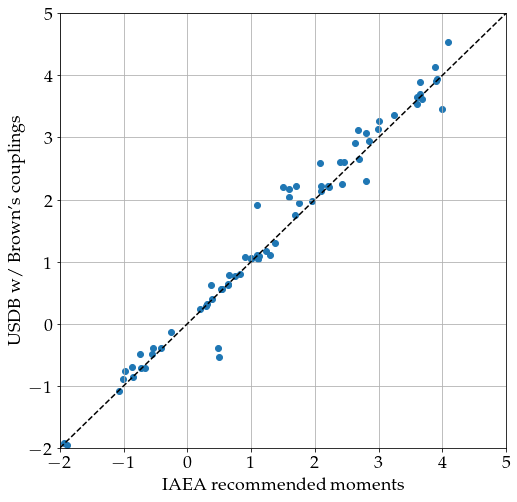

In [33]:
plt.figure(figsize=(8,8))
plt.grid()
plt.scatter(df_usdb['mu (nm)'], df_usdb['usdb w/ g_Brown'])
plt.plot(np.array([-2,5]),np.array([-2,5]),c='k',ls='--')
plt.xlim([-2,5])
plt.ylim([-2,5])
plt.xlabel('IAEA recommended moments')
plt.ylabel("USDB w/ Brown's couplings")
plt.show()

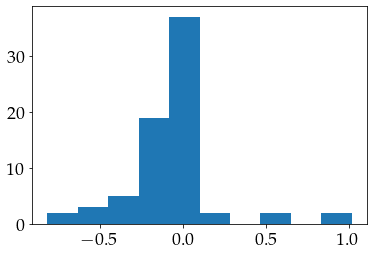

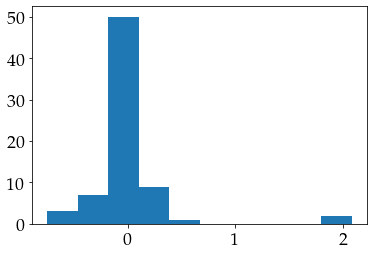

In [27]:
er = df_usdb['mu (nm)'] - df_usdb['usdb w/ g_Brown'] 
rel_er = er / df_usdb['mu (nm)']
plt.hist(er)
plt.show()

plt.hist(rel_er)
plt.show()

In [28]:
np.argmax(rel_er)

11

In [29]:
df_usdb.iloc[11]

Unnamed: 0                                               11
Z                                                        10
A                                                        21
Element                                                  Ne
Energy (keV)                                            351
Thalf                                                7.1 ps
Ji                                                      5/2
ni                                                        1
Moment (nm)                                         0.49(4)
method                                                RIV/D
description        Recoil into Vacuum / Differential method
nsr                                                1978Ro10
journal                                      JP G4 431 (78)
indc                                          indc-nds-0816
N                                                        11
twoJi                                                     5
mu (nm)                                 